In [42]:
# Importing the dataset
dataset <- read.csv("D:\\projectR\\datafiles\\creditcard.csv", header = TRUE,
                stringsAsFactors = FALSE,
                strip.white = TRUE ,
                sep = ',')

In [43]:
#checking overall dataset and coverting 'class' as factor variables 
str(dataset)
dataset$Class = as.factor(dataset$Class)
str(dataset$Class)

'data.frame':	284807 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V

In [44]:
#Excluding 'Time' variable from dataset for further analysis
dataset = dataset[,2:31]

In [45]:
#To overcome the imbalance in dataset I'll apply oversampling or undersampling
#Checking imbalance in the dataset
summary(dataset$Class)
prop.table(table(dataset$Class)) #99.8% proper transaction, 0.2% fraud. 

0      1 
284315    492


          0           1 
0.998272514 0.001727486 

In [46]:
# Feature Scaling for 'amount'
library(scales)
dataset[,29] = rescale(dataset[,29], to = c(0,1))
summary(dataset$Amount)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000000 0.0002180 0.0008563 0.0034389 0.0030036 1.0000000 

In [56]:
# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Class, SplitRatio = 0.8)
training = subset(dataset, split == TRUE)
test = subset(dataset, split == FALSE)
summary(training$Class)
summary(test$Class)

0      1 
227452    394

0     1 
56863    98

In [57]:
#install.packages("ROSE")
#Implementing oversampling
library(ROSE)
trainingover = ovun.sample(Class~., data = training, method = 'over', 
                       N =2*227452 , seed = 1234)$data
summary(trainingover$Class)


0      1 
227452 227452

In [58]:
training <- trainingover[,1:28]
head(training)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
-1.3598071,-0.07278117,2.53634674,1.3781552,-0.33832077,0.46238778,0.239598554,0.09869790,0.3637870,0.09079417,...,0.40399296,0.25141210,-0.01830678,0.2778376,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.021053053
1.1918571,0.26615071,0.16648011,0.4481541,0.06001765,-0.08236081,-0.078802983,0.08510165,-0.2554251,-0.16697441,...,-0.14578304,-0.06908314,-0.22577525,-0.6386720,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.014724169
-1.3583541,-1.34016307,1.77320934,0.3797796,-0.50319813,1.80049938,0.791460956,0.24767579,-1.5146543,0.20764287,...,-2.26185710,0.52497973,0.24799815,0.7716794,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.059751841
-0.4259659,0.96052304,1.14110934,-0.1682521,0.42098688,-0.02972755,0.476200949,0.26031433,-0.5686714,-0.37140720,...,-0.03319379,0.08496767,-0.20825351,-0.5598248,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.081080257
1.2296576,0.14100351,0.04537077,1.2026127,0.19188099,0.27270812,-0.005159003,0.08121294,0.4649600,-0.09925432,...,-0.04557504,-0.21963255,-0.16771627,-0.2707097,-0.15410379,-0.78005542,0.7501369,-0.2572368,0.034507430,0.005167769
-0.8942861,0.28615720,-0.11319221,-0.2715261,2.66959866,3.72181806,0.370145128,0.85108444,-0.3920476,-0.41043043,...,0.57032817,0.05273567,-0.07342510,-0.2680916,-0.20423267,1.01159180,0.3732047,-0.3841573,0.011747356,0.142404330


In [59]:
df2 <- prcomp(training, scale = FALSE)
summary(df2)

Importance of components:
                           PC1    PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     15.1346 5.8657 5.09493 3.44385 3.32816 2.01420 1.6150
Proportion of Variance  0.6765 0.1016 0.07666 0.03503 0.03271 0.01198 0.0077
Cumulative Proportion   0.6765 0.7781 0.85473 0.88976 0.92247 0.93445 0.9422
                           PC8     PC9    PC10    PC11    PC12    PC13   PC14
Standard deviation     1.55468 1.47536 1.32507 1.18987 1.18444 1.14299 1.0723
Proportion of Variance 0.00714 0.00643 0.00519 0.00418 0.00414 0.00386 0.0034
Cumulative Proportion  0.94929 0.95572 0.96091 0.96509 0.96923 0.97309 0.9765
                          PC15    PC16   PC17    PC18    PC19    PC20   PC21
Standard deviation     1.06454 0.98228 0.9562 0.91617 0.84637 0.80436 0.7578
Proportion of Variance 0.00335 0.00285 0.0027 0.00248 0.00212 0.00191 0.0017
Cumulative Proportion  0.97983 0.98268 0.9854 0.98786 0.98998 0.99189 0.9936
                          PC22    PC23   PC24 

In [60]:
##
library("factoextra")
var <- get_pca_var(df2)
var
head(var$contrib)

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,...,Dim.19,Dim.20,Dim.21,Dim.22,Dim.23,Dim.24,Dim.25,Dim.26,Dim.27,Dim.28
V1,11.1648464,8.4639915,10.7150249,0.360883,4.95294621,29.9013577,14.4992065,1.5042946,14.835665,1.26979037,...,0.03384613,0.10954948,0.007348921,9.119045e-03,0.0007837571,0.006033358,0.128376815,0.001086953,0.002185708,2.734410e-02
V2,4.8234508,2.7467068,0.1560457,4.884773,0.65655665,32.6778358,0.5743747,15.7055224,25.974158,2.07529109,...,0.30195144,0.17651819,0.128890254,1.172161e-01,0.0043108515,0.046253950,0.145053196,0.003191292,0.021720019,3.236437e-01
V3,16.4233603,1.0337081,4.8236519,14.757942,0.02321016,0.4512257,2.1102452,5.8851972,23.205743,0.62974967,...,0.11126247,0.03649974,0.252285537,2.912672e-02,0.0078655912,0.016450798,0.014624667,0.056847004,0.002722802,1.319847e-02
V4,3.1558205,0.5678736,1.5339418,5.593362,3.08691746,2.3724884,17.1240843,31.3695966,13.790697,0.72517948,...,0.38657161,1.75703387,0.087812933,2.771187e-05,0.0211797458,0.009683125,0.266033267,0.012902468,0.010109315,4.362192e-02
V5,6.4125345,1.6686422,7.9620806,3.266908,1.35876813,21.7225937,8.2124149,4.2593082,3.792980,0.01525737,...,0.14835024,1.38517533,0.669958170,3.473426e-03,0.2358845719,0.108156847,0.017144567,0.137318688,0.002552625,3.390904e-02
V6,0.2700756,2.4764267,0.6854086,1.297706,0.17253758,4.5012088,11.7417698,0.1542052,1.649431,0.42427669,...,0.95821404,0.02326384,0.288443097,1.267447e+00,0.0968015169,0.171856588,0.009862803,0.336894810,0.040263827,7.452865e-05


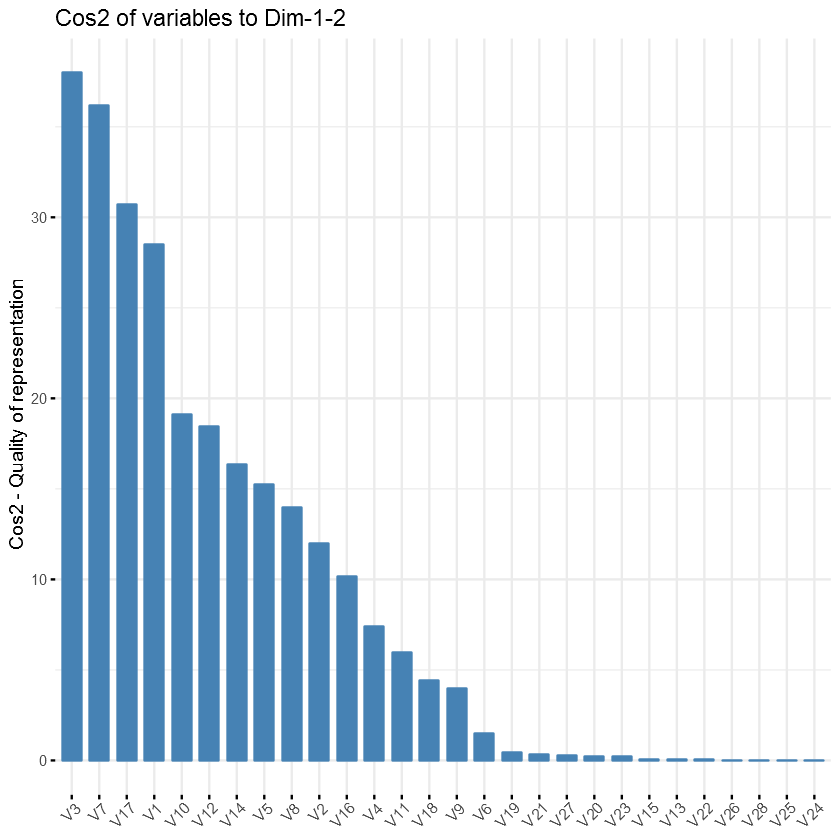

In [61]:

##
fviz_cos2(df2, choice = "var", axes = 1:2)

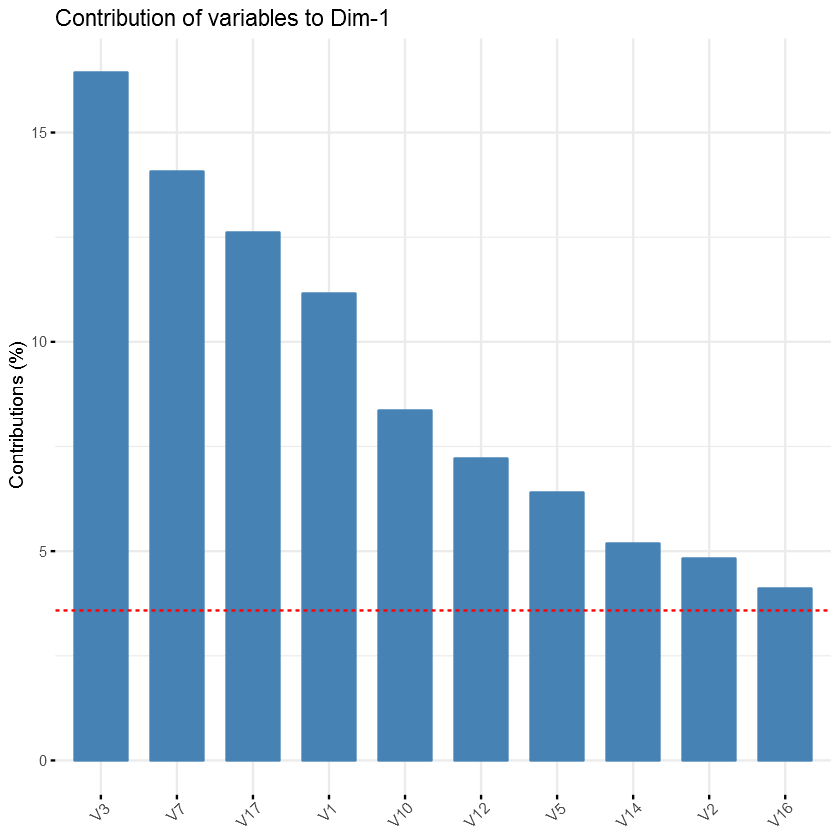

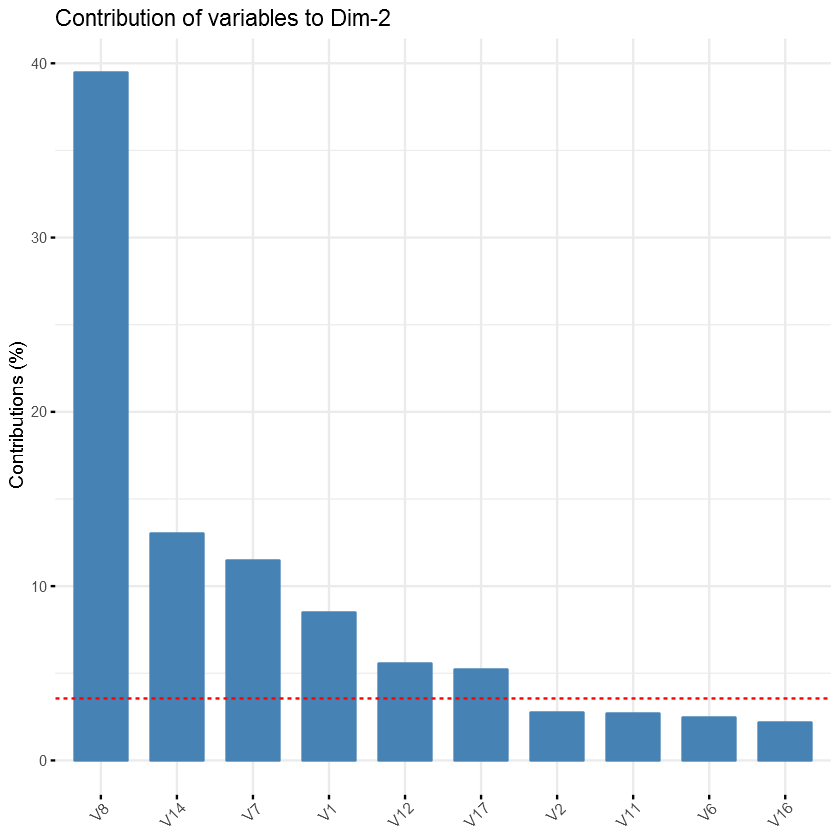

In [62]:
##
# Contributions of variables to PC1
fviz_contrib(df2, choice = "var", axes = 1, top = 10)
# Contributions of variables to PC2
fviz_contrib(df2, choice = "var", axes = 2, top = 10)

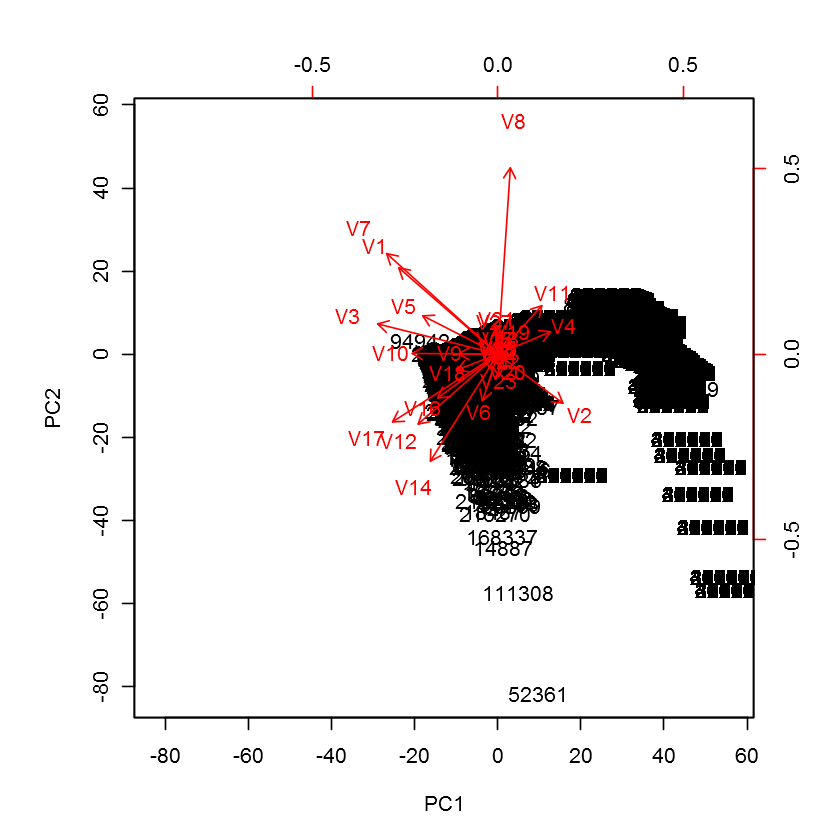

In [63]:
##
biplot(df2, scale = 0)

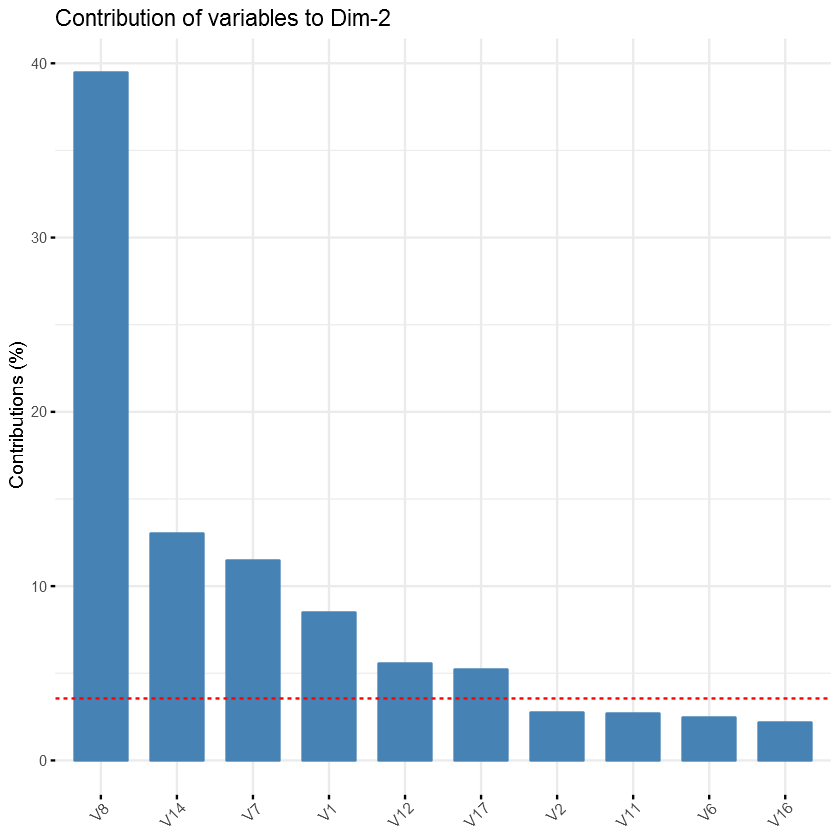

In [64]:
# Total contribution on PC1 and PC2
fviz_contrib(df2, choice = "var", axes = 2, top=10)

In [65]:
pca_train <- training[c(7,8,14)]
head(pca_train)

V7,V8,V14
0.239598554,0.09869790,-0.31116935
-0.078802983,0.08510165,-0.14377230
0.791460956,0.24767579,-0.16594592
0.476200949,0.26031433,-0.13713370
-0.005159003,0.08121294,0.16737196
0.370145128,0.85108444,0.07435536


In [66]:
cor(pca_train)

,V7,V8,V14
V7,1.0000000,0.1060401,0.5169336
V8,0.1060401,1.0000000,-0.1777234
V14,0.5169336,-0.1777234,1.0000000


In [67]:
#logistic model

fit = glm(Class ~ V7+V8+V14, data=trainingover, family=binomial)
summary(fit)




Call:
glm(formula = Class ~ V7 + V8 + V14, family = binomial, data = trainingover)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.1917  -0.4405  -0.0022   0.0695   3.0025  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.228326   0.007056 -315.81   <2e-16 ***
V7          -0.160681   0.003180  -50.53   <2e-16 ***
V8          -0.175461   0.003299  -53.19   <2e-16 ***
V14         -1.119357   0.004310 -259.70   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 630631  on 454903  degrees of freedom
Residual deviance: 203925  on 454900  degrees of freedom
AIC: 203933

Number of Fisher Scoring iterations: 8


[1] 0.8877551

[1] 0.9680988

,0,1
0,55049,11
1,1814,87


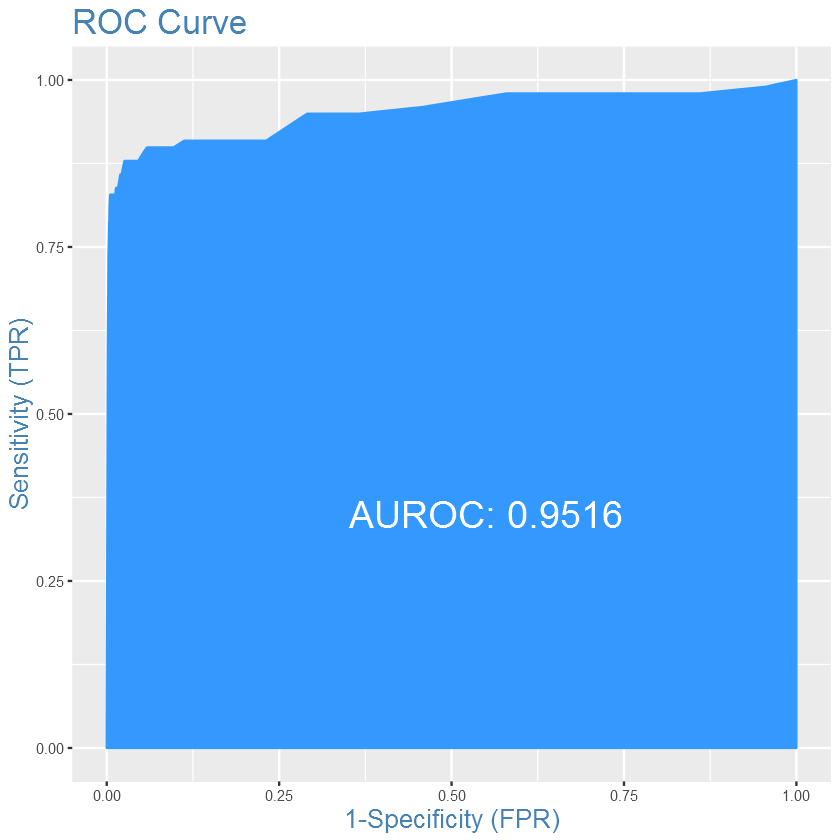

In [68]:
library(InformationValue)
predicted <- predict(fit, test, type="response")  # predicted scores
#predicted
plotROC(test, predicted)


sensitivity(test$Class, predicted, threshold = 0.45)

specificity(test$Class, predicted, threshold = 0.45)


confusionMatrix(test$Class, predicted > 0.45)

In [72]:
sensitivity(test$Class, predicted, threshold = 0.7)

specificity(test$Class, predicted, threshold = 0.7)


confusionMatrix(test$Class, predicted > 0.7)

[1] 0.8367347

[1] 0.9900638

,0,1
0,56298,16
1,565,82


In [73]:
library("e1071")
classifier1 = svm(formula = Class~V7+V8+V14, data = trainingover,
                  type = 'C-classification',
                  kernel = 'linear')
classifier1


Call:
svm(formula = Class ~ V7 + V8 + V14, data = trainingover, type = "C-classification", 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.3333333 

Number of Support Vectors:  87873


In [74]:
test_pred2 = predict(classifier1, type = 'response', newdata = test[,-30])
# Making Confusion Matrix
cm2 = table(test[,30], test_pred2)

cm2

   test_pred2
        0     1
  0 55909   954
  1    14    84

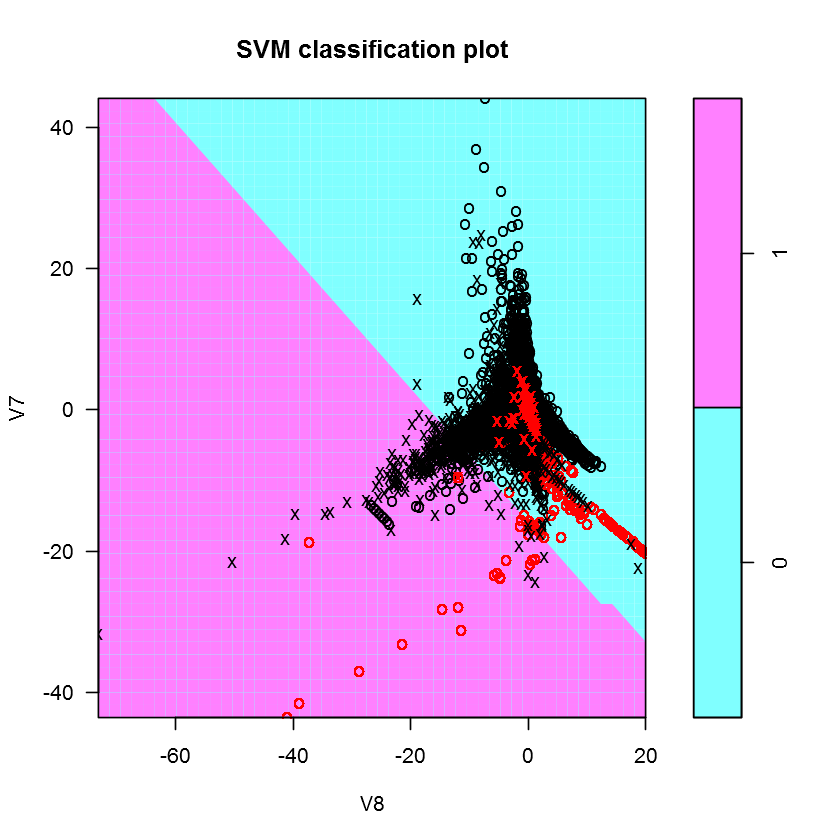

In [77]:
plot(classifier1, trainingover, V7 ~ V8)

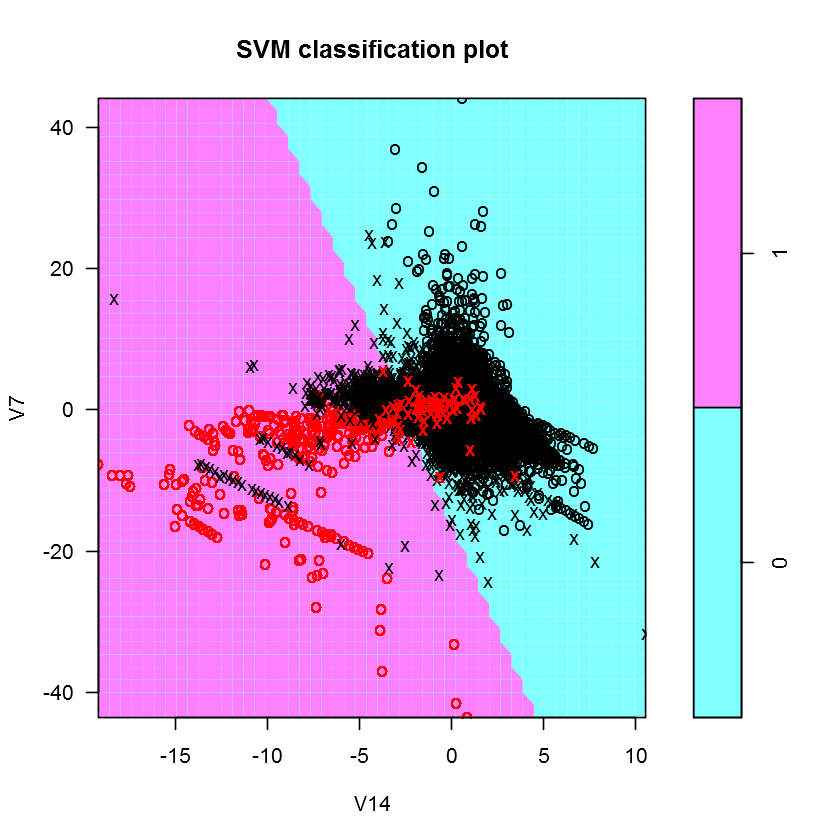

In [78]:
plot(classifier1, trainingover, V7 ~ V14)

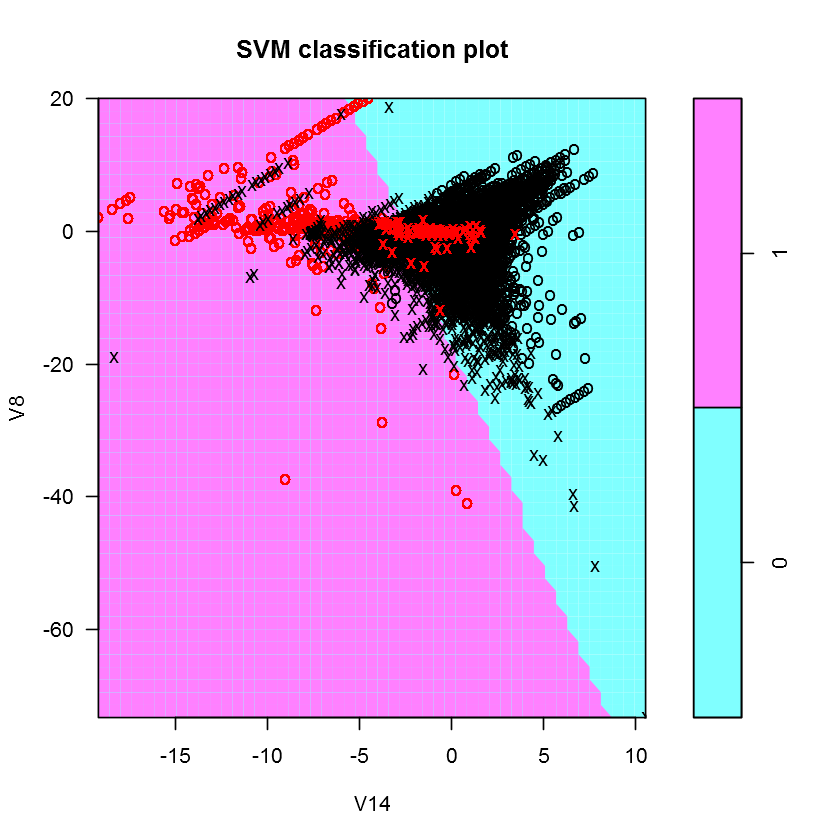

In [79]:
plot(classifier1, trainingover, V8 ~ V14)

Warning message:
"package 'rpart' was built under R version 3.5.2"Rattle: A free graphical interface for data science with R.
Version 5.2.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


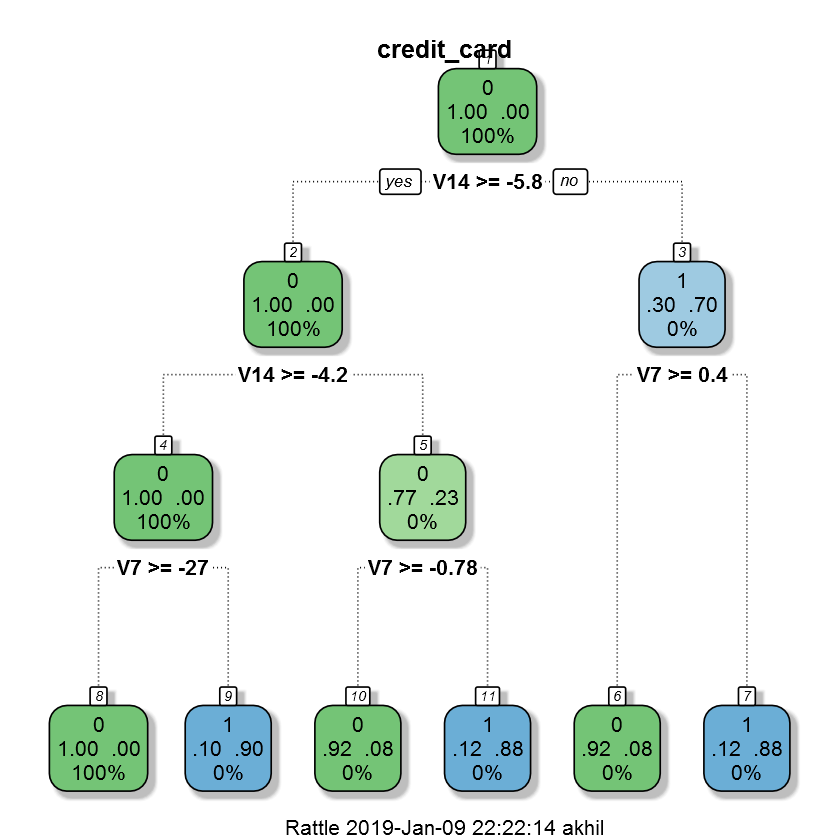

In [80]:
# load libraries
library(rpart)
library(rattle)
 
rpart <- rpart(Class ~ V14+V8+V7, data=dataset, method="class",)

# plot decision tree
fancyRpartPlot(rpart, main="credit_card")